In [24]:
from polpymer.core_funcs import Polymer, Monomer
from polpymer.data_funcs import plot_polymer, grow_polymer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
""" We can start a new Polymer object with a starting Monomer(angle) where angle is {0,1,2,3} for 0*90, 1*90, 2*90, 3*90 degrees

Here we start the chain with a monomer to the right
"""
first_monomer = Monomer(0)

polymer = Polymer((10,10), (5,5), first_monomer)
print(first_monomer.end_location)

(6, 5)


In [3]:
print(polymer.chain_end)
print(polymer.chain_start)

(6, 5)
(5, 5)


In [4]:
polymer.add_monomer(3) # add monomer down
print(polymer.chain_end)

(6, 4)


In [5]:
"""
Since we dont want our Polymer to close we see that we get an arrow if we now
add further monomers that go to the left and up again
"""

polymer.add_monomer(2) # add monomer to the left
print(polymer.chain_end)
polymer.add_monomer(1) # add monomer up (should error out)
print(polymer.chain_end)

(5, 4)


Exception: Proposed monomer's end location already a node of polymer

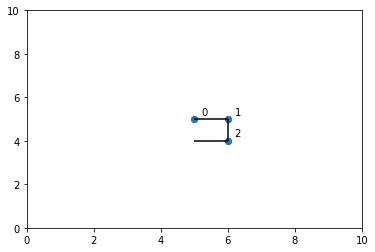

In [6]:
plot_polymer(polymer)

In [7]:
for monomer in polymer:
    print(monomer, "angle = {}".format(monomer.angle))

Monomer from (5, 5) to (6, 5) angle = 0
Monomer from (6, 5) to (6, 4) angle = 3
Monomer from (6, 4) to (5, 4) angle = 2


In [8]:
polymer1 = Polymer((10,10), (5,5), first_monomer)

In [9]:
from random import randint

random_angles = [randint(0,3) for i in range(10)]

for i in random_angles:
    polymer1.add_monomer(i)

Exception: Proposed monomer's end location already a node of polymer

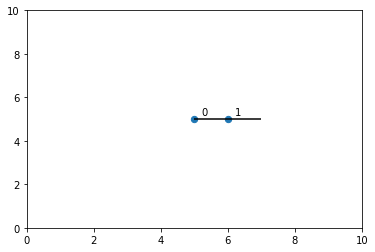

In [10]:
plot_polymer(polymer1)

In [2]:
m, polymer2 = grow_polymer((20,20), (10,10), 3)
m

array([3., 3.])

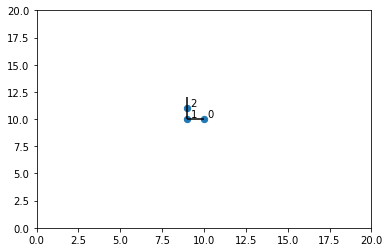

In [3]:
plot_polymer(polymer2)

In [4]:
polymer2.chain_length

3

'Distribution of end to end distances is as expected for these lengths'

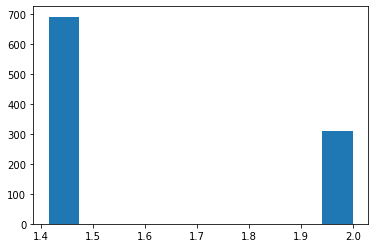

In [52]:
"""
run test to check if behaviour is as expected for random polymers of length 1, 2, 3
"""
N = 1000
L = 2
end2end = np.zeros(N)
for i in range(N):
    test_m, testpoly = grow_polymer((10,10), (5,5), L)
    end2end[i] = np.sqrt(testpoly.distance_end_start())

plt.hist(end2end)
plt.savefig('Figures/end2endDistribution_L={}'.format(L))

"Distribution of end to end distances is as expected for these lengths"

SyntaxError: EOF while scanning triple-quoted string literal (3741424044.py, line 2)